<a href="https://colab.research.google.com/github/anishdass/AyushmanTaughtThis/blob/master/pandas_tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
##Trick 1: Select prescribed percentage of rows for manipulating

accidents = pd.read_csv('US_Accidents_Dec19.csv')

print('shape of the dataframe = {}'.format(accidents.shape))

accidents = pd.read_csv('US_Accidents_Dec19.csv', skiprows= lambda x:x > 0 and np.random.rand() > .01) #.01 means we're skipping 99% of the total rows.

print('shape of the dataframe after skipping rows = {}'.format(accidents.shape))

shape of the dataframe = (24806, 49)
shape of the dataframe after skipping rows = (217, 49)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
#Trick 2: Avoiding unnamed: 0 columns

d = {\
     'zip_code': [12345, 56789, 101112, 131415],
     'factory':[100, 400, 500, 600],
     'warehouse':[200, 300, 400, 500],
     'retail':[1, 2, 3, 4]
     }

address = pd.DataFrame(d)
print(address)

df.to_csv('unnamed0.csv')#Way 3: index = False)

unnamed0_1 = pd.read_csv('unnamed0.csv')

print(unnamed0_1) ##Here you can find the newly created column which was not there previously creating named 'unnamed0'

#How to avoid it


#Way 1
unnamed0_1 = pd.read_csv('unnamed0.csv', index_col=0)

#Way 2
#unnamed0_1 = unnamed0_1.drop(['Unnamed: 0'], axis = 1)

print(unnamed0_1)

   zip_code  factory  warehouse  retail
0     12345      100        200       1
1     56789      400        300       2
2    101112      500        400       3
3    131415      600        500       4
   Unnamed: 0  zip code  factory  warehouse  retail
0           0     12345      100        200       1
1           1     56789      400        300       2
2           2    101112      500        400       3
3           3    131415      600        500       4
   zip code  factory  warehouse  retail
0     12345      100        200       1
1     56789      400        300       2
2    101112      500        400       3
3    131415      600        500       4


In [45]:
##Trick 3: 
#Convert a wide df into a long one, basically decreasing the breadth and increasing the length
#Refer previous dataframe

address = address.melt(id_vars = 'zip_code', var_name = 'location_type', value_name = 'distance')

print(address)




   zip_code  factory  warehouse  retail
0     12345      100        200       1
1     56789      400        300       2
2    101112      500        400       3
3    131415      600        500       4
    zip_code location_type  distance
0      12345       factory       100
1      56789       factory       400
2     101112       factory       500
3     131415       factory       600
4      12345     warehouse       200
5      56789     warehouse       300
6     101112     warehouse       400
7     131415     warehouse       500
8      12345        retail         1
9      56789        retail         2
10    101112        retail         3
11    131415        retail         4


In [58]:
#Trick 4:
#Convert year and day of year in a single datetime column

time = {
    'year':[2019, 2019, 2020],
    'day_of_year':[350, 361, 1]
}

time_df = pd.DataFrame(time)
print(time_df)

time_df['combined'] = time_df['year']*1000 + time_df['day_of_year']
print(time_df)

time_df['date'] = pd.to_datetime(time_df['combined'], format = '%Y%j') ##Cheatsheet
time_df

   year  day_of_year
0  2019          350
1  2019          361
2  2020            1
   year  day_of_year  combined
0  2019          350   2019350
1  2019          361   2019361
2  2020            1   2020001


,year,day_of_year,combined,date
0,2019,350,2019350,2019-12-16
1,2019,361,2019361,2019-12-27
2,2020,1,2020001,2020-01-01


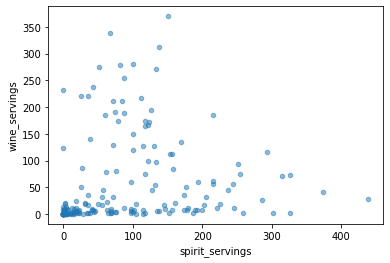

In [80]:
##Pending
#Trick 5: Interactive plots out of box in pandas
#upload drinks dataset

drinks = pd.read_csv('drinks.csv')
drinks.plot(kind = 'scatter', x = 'spirit_servings', y = 'wine_servings', alpha = 0.5)
plt.show()

In [106]:
##Trick 6:
#Count all the missing values
missing = {\
           'col1':[2019, 2019, 2020],
           'col2':[365, np.nan, 1],
           'col3':[np.nan, 365, None]
           }

missing_df = pd.DataFrame(missing)

#Way1
missing_df.isnull().sum().sum()

#Way2
missing_df.isna().sum().sum()

#Way3
missing_df.isna().any()

col1    True
col2    True
col3    True
dtype: bool

In [121]:
#Trick 7:
#Save memory by fixing your date

titanic = pd.read_csv('train.csv', usecols= ['Pclass','Sex','Parch', 'Cabin'])
titanic.head()

print(titanic.memory_usage( deep=True ))

titanic_1 = titanic.astype({
    'Pclass':'int8',
    'Sex':'category',
    'Parch':'Sparse[int]',
    'Cabin':'Sparse[str]',
    })

print(titanic_1.memory_usage(deep = True))

Index       128
Pclass     7128
Sex       54979
Parch      7128
Cabin     34376
dtype: int64
Index       128
Pclass      891
Sex        1095
Parch      2556
Cabin     29696
dtype: int64


In [144]:
##Trick 8:
#Combine small categories into a single category called others

d = {\
     'genre':['A','A','B','S','J','G','D','J','H','A','S','D','O','H','F','W','H','F','A','S','S','B','C','K','S','D','H','F','O','I','E','R','O','T','H','W','E','E','O','R','H','D','K','B','K','X','B','K','V','B','S','K','G','E','H','G','O','I','J','K','B','X','C','K','B','K','V','J','B','J','H','G','O']
     }

genre_df = pd.DataFrame(d)

print(genre_df)

frequencies = genre_df['genre'].value_counts(normalize = True)
frequencies

threshold = 0.1
small_categories = frequencies[frequencies < threshold].index
print(small_categories)

genre_df['genre'] = genre_df['genre'].replace(small_categories, 'Others')

genre_df['genre'].value_counts(normalize = True)

genre_df.head(10)

   genre
0      A
1      A
2      B
3      S
4      J
..   ...
68     B
69     J
70     H
71     G
72     O

[73 rows x 1 columns]
Index(['S', 'O', 'J', 'E', 'G', 'A', 'D', 'F', 'X', 'R', 'C', 'W', 'I', 'V',
       'T'],
      dtype='object')


,genre
0,Others
1,Others
2,B
3,Others
4,Others
5,Others
6,Others
7,Others
8,H
9,Others


In [153]:
##Trick 9
#Clean object column with mixed data using regex

d = {\
     'Customers':['A', 'B', 'C', 'D'],
     'sales':[1100, 950.75, '$400', '$1250.35']
     }

customer_df = pd.DataFrame(d) 
customer_df.head()


customer_df['sales'].apply(type)

customer_df['sales'] = customer_df['sales'].replace('[$,]','', regex = True).astype('float') ##Doubt

customer_df['sales'].apply(type)

customer_df.head()

,Customers,sales
0,A,1100.00
1,B,950.75
2,C,400.00
3,D,1250.35


In [159]:
#Trick 10:
#Creating a time series dataset for testing
hours_in_a_year = 365*24

time_dataframe = pd.util.testing.makeTimeDataFrame(hours_in_a_year, freq = 'H')

num_cols = 2

cols = ['sales', 'customer']

time_df = pd.DataFrame(np.random.randint(1, 100, size = (hours_in_a_year, num_cols)), columns= cols)

time_df.index = pd.util.testing.makeDateIndex(hours_in_a_year, freq= 'H')

time_df

,sales,customer
2000-01-01 00:00:00,32,75
2000-01-01 01:00:00,36,53
2000-01-01 02:00:00,13,23
2000-01-01 03:00:00,12,4
2000-01-01 04:00:00,19,47
...,...,...
2000-12-30 19:00:00,37,61
2000-12-30 20:00:00,12,74
2000-12-30 21:00:00,89,85
2000-12-30 22:00:00,96,31
